<a href="https://colab.research.google.com/github/jesusGS01/BDGE/blob/main/mongo/sesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NoSQL (MongoDB) (sesión 4)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en el contenedor usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [ ]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [ ]:
db_hostname = "localhost" if RunningInCOLAB else "mongo"

In [ ]:
!wget -qO - https://www.mongodb.org/static/pgp/server-6.0.asc | sudo gpg --dearmor > /etc/apt/trusted.gpg.d/mongo-server-6.gpg

In [ ]:
%%bash
sudo adduser --system --no-create-home mongodb
sudo addgroup --system mongodb
sudo adduser mongodb mongodb

# create db -- note: this should agree with dbpath in mongod.conf
if [ ! -d /var/lib/mongodb ]; then
  sudo mkdir -p /var/lib/mongodb
  sudo chown mongodb:mongodb /var/lib/mongodb
fi

# create logdir -- note: this should agree with logpath in mongod.conf
if [ ! -d /var/log/mongodb ]; then
  sudo mkdir -p /var/log/mongodb
  sudo chown mongodb:mongodb /var/log/mongodb
fi

Adding system user `mongodb' (UID 104) ...
Adding new user `mongodb' (UID 104) with group `nogroup' ...
Not creating home directory `/home/mongodb'.
Adding group `mongodb' (GID 107) ...
Done.
Adding user `mongodb' to group `mongodb' ...
Adding user mongodb to group mongodb
Done.


In [ ]:
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list

deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse


In [ ]:
!sudo apt-get update -qq

In [ ]:
!sudo ln -sf /bin/true /bin/systemctl

In [ ]:
!sudo apt-get install -y -qq dialog mongodb-org

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dialog.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../0-dialog_1.3-20211214-1_amd64.deb ...
Unpacking dialog (1.3-20211214-1) ...
Selecting previously unselected package mongodb-database-tools.
Preparing to unpack .../1-mongodb-database-tools_100.9.3_amd64.deb ...
Unpacking mongodb-database-tools (100.9.3) ...
Selecting previously unselected package mongodb-mongosh.
Preparing to unpack .../2-mongodb-mongosh_2.1.0_amd64.deb ...
Unpacking mongodb-mongosh (2

In [ ]:
!sudo /usr/bin/mongod --config /etc/mongod.conf --fork

about to fork child process, waiting until server is ready for connections.
forked process: 1477
child process started successfully, parent exiting


In [ ]:
!sudo mongod --version

db version v6.0.11
Build Info: {
    "version": "6.0.11",
    "gitVersion": "f797f841eaf1759c770271ae00c88b92b2766eed",
    "openSSLVersion": "OpenSSL 3.0.2 15 Mar 2022",
    "modules": [],
    "allocator": "tcmalloc",
    "environment": {
        "distmod": "ubuntu2204",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


## Inicio de la hoja


In [ ]:
!pip install --upgrade pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 9.4 MB/s eta 0:00:00


In [ ]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [ ]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [ ]:
client = MongoClient(db_hostname,27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [ ]:
client.list_database_names()

['admin', 'config', 'local']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [ ]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [ ]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [ ]:
import csv
from datetime import datetime

def csv_to_mongo(file, coll):
    """
    Carga un fichero CSV en Mongo. file especifica el fichero, coll la colección
    dentro de la base de datos, y date_cols las columnas que serán interpretadas
    como fechas.
    """
    # Convertir todos los elementos que se puedan a números
    def to_numeric(d):
        try:
            return int(d)
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d

    def to_date(d):
        """To ISO Date. If this cannot be converted, return NULL (None)"""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None

    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')

        # Se leen las columnas. Sus nombres se usarán para crear las diferentes columnas en la familia
        columns = next(reader)

        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))

        docs=[]
        for row in reader:
            row = [func(e) for (func,e) in zip(func_to_cols, row)]
            docs.append(dict(zip(columns, row)))
        coll.insert_many(docs)

In [ ]:
import gzip
from urllib.request import Request,urlopen
import io
import os
import os.path as path

def download_csv(baseurl, filename):
    """
    Descarga el CSV especificado, que estará comprimido con GZIP. Lo
    descomprime y lo guarda en el directorio actual dado por `filename`.
    """
    file = path.abspath(path.join(os.getcwd(),filename))
    request = Request(baseurl + '/' + filename+'.gz?raw=true')
    response = urlopen(request)
    buf = io.BytesIO(response.read())
    f = gzip.GzipFile(fileobj=buf)
    data = f.read()
    with open (filename, 'wb') as ff:
      ff.write(data)

baseurl = 'https://github.com/dsevilla/bdge-data/blob/master/es.stackoverflow/'
download_csv(baseurl, 'Posts.csv')
download_csv(baseurl, 'Users.csv')
download_csv(baseurl, 'Tags.csv')
download_csv(baseurl, 'Comments.csv')
download_csv(baseurl, 'Votes.csv')

In [ ]:
csv_to_mongo('Posts.csv',db.posts)

In [ ]:
csv_to_mongo('Users.csv',db.users)

In [ ]:
csv_to_mongo('Votes.csv',db.votes)

In [ ]:
csv_to_mongo('Comments.csv',db.comments)

In [ ]:
csv_to_mongo('Tags.csv',db.tags)

In [ ]:
posts.count_documents({})

76278

### El API de colección de MongoDB

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python

### Creación de índices

Para que el proceso map-reduce y de agregación funcione mejor, voy a crear índices sobre los atributos que se usarán como índice... Ojo, si no se crea las consultas pueden tardar mucho.

In [ ]:
(
    db.posts.create_index([('Id', pymongo.HASHED)]),
    db.comments.create_index([('Id', pymongo.HASHED)]),
    db.users.create_index([('Id', pymongo.HASHED)])
)

('Id_hashed', 'Id_hashed', 'Id_hashed')

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:
![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)

In [ ]:
db.posts.distinct('Score')

[-13,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 62,
 63,
 69,
 77,
 89,
 94,
 98,
 106,
 174]

## Framework de Agregación

Framework de agregación:
- Aquí está la referencia de las diferentes etapas por las que puede pasar un pipeline: https://www.mongodb.com/docs/manual/reference/operator/aggregation-pipeline/.
- Y aquí los distintos operadores que se permiten dentro de las etapas: https://docs.mongodb.com/manual/reference/operator/aggregation/.
- Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/.

A continuación otro vídeo interseante:

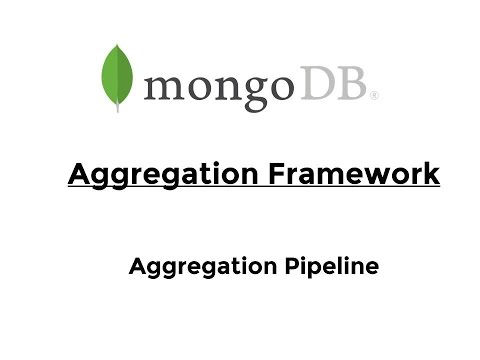

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [ ]:
respuestas = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

[{'_id': ObjectId('655f120aab4a8f1d045445f9'), 'Id': 1},
 {'_id': ObjectId('655f120aab4a8f1d045445fa'), 'Id': 2},
 {'_id': ObjectId('655f120aab4a8f1d045445fb'), 'Id': 3},
 {'_id': ObjectId('655f120aab4a8f1d045445fc'), 'Id': 4},
 {'_id': ObjectId('655f120aab4a8f1d045445fd'), 'Id': 5},
 {'_id': ObjectId('655f120aab4a8f1d045445fe'), 'Id': 6},
 {'_id': ObjectId('655f120aab4a8f1d045445ff'), 'Id': 7},
 {'_id': ObjectId('655f120aab4a8f1d04544600'), 'Id': 8},
 {'_id': ObjectId('655f120aab4a8f1d04544601'), 'Id': 9},
 {'_id': ObjectId('655f120aab4a8f1d04544602'), 'Id': 10},
 {'_id': ObjectId('655f120aab4a8f1d04544603'), 'Id': 11},
 {'_id': ObjectId('655f120aab4a8f1d04544604'), 'Id': 12},
 {'_id': ObjectId('655f120aab4a8f1d04544605'), 'Id': 14},
 {'_id': ObjectId('655f120aab4a8f1d04544606'), 'Id': 15},
 {'_id': ObjectId('655f120aab4a8f1d04544607'), 'Id': 16},
 {'_id': ObjectId('655f120aab4a8f1d04544608'), 'Id': 17},
 {'_id': ObjectId('655f120aab4a8f1d04544609'), 'Id': 18},
 {'_id': ObjectId('655f

_Lookup_!

In [ ]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
list(respuestas)

[{'_id': ObjectId('655f120aab4a8f1d04544619'),
  'Id': 36,
  'AcceptedAnswerId': 40,
  'AnswerCount': 2,
  'Body': '<p>¿Cuál es la diferencia entre un <code>inner</code> y un <code>outer join</code>?</p><br/><br/><p>Y ¿cuál es la función de los modificadores <code>left</code>, <code>right</code> o <code>full</code>?</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 11, 2, 15, 31, 51, 453000),
  'FavoriteCount': 14,
  'LastActivityDate': datetime.datetime(2017, 7, 27, 18, 24, 16, 747000),
  'LastEditDate': datetime.datetime(2017, 3, 4, 4, 23, 32, 177000),
  'LastEditorDisplayName': '',
  'LastEditorUserId': 29967,
  'OwnerDisplayName': '',
  'OwnerUserId': 21,
  'ParentId': '',
  'PostTypeId': 1,
  'Score': 54,
  'Tags': '<mysql><sql><join>',
  'Title': '¿Cuál es la diferencia entre un inner y un outer join?',
  'ViewCount': 6015,
  'owner': [{'_id': ObjectId('655f120fab4a8f1d04557004'),
    'Id': 21,
    'About

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [ ]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' : {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName' : True
          }}
        ])
list(respuestas)

[{'_id': ObjectId('655f120aab4a8f1d04544619'),
  'Id': 36,
  'Score': 54,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('655f120aab4a8f1d0454461d'),
  'Id': 40,
  'Score': 98,
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'_id': ObjectId('655f120aab4a8f1d04544640'),
  'Id': 94,
  'Score': 44,
  'owner': [{'DisplayName': 'Jcl'}],
  'username': 'Jcl'},
 {'_id': ObjectId('655f120aab4a8f1d04544674'),
  'Id': 151,
  'Score': 47,
  'owner': [{'DisplayName': 'Hewbot'}],
  'username': 'Hewbot'},
 {'_id': ObjectId('655f120aab4a8f1d0454469d'),
  'Id': 197,
  'Score': 77,
  'owner': [{'DisplayName': 'Peter Olson'}],
  'username': 'Peter Olson'},
 {'_id': ObjectId('655f120aab4a8f1d045446a1'),
  'Id': 204,
  'Score': 106,
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'_id': ObjectId('655f120aab4a8f1d045446b5'),
  'Id': 225,
  'Score': 43,
  'owner': [{'DisplayName': 'Jordi Castilla'}],
  'username': 'Jo

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [ ]:
respuestas = db.posts.aggregate( [
        { '$match': { 'Score' : {'$gte': 40}}},
        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },
        { '$unwind': '$owner'},
        { '$project' : {
             'username': '$owner.DisplayName'
          }
        }
        ])
list(respuestas)

[{'_id': ObjectId('655f120aab4a8f1d04544619'), 'username': 'jachguate'},
 {'_id': ObjectId('655f120aab4a8f1d0454461d'), 'username': 'jachguate'},
 {'_id': ObjectId('655f120aab4a8f1d04544640'), 'username': 'Jcl'},
 {'_id': ObjectId('655f120aab4a8f1d04544674'), 'username': 'Hewbot'},
 {'_id': ObjectId('655f120aab4a8f1d0454469d'), 'username': 'Peter Olson'},
 {'_id': ObjectId('655f120aab4a8f1d045446a1'), 'username': 'Konamiman'},
 {'_id': ObjectId('655f120aab4a8f1d045446b5'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('655f120aab4a8f1d045446b6'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('655f120aab4a8f1d04544714'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('655f120aab4a8f1d04544758'), 'username': 'Peter Olson'},
 {'_id': ObjectId('655f120aab4a8f1d04546963'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('655f120aab4a8f1d04547f28'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('655f120aab4a8f1d04547f29'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('655f120

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta RQ4:

In [ ]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q': '$OP', '1a': '$OwnerUserId'}}
          }
        },
        {
          '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'}
          }
        },
        {
          '$match' : { 'npairs' : { '$eq' : 2}}
        }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 95, 'max': 29967},
  'pairs': [{'0q': 95, '1a': 29967}, {'0q': 29967, '1a': 95}],
  'npairs': 2},
 {'_id': {'min': 48306, 'max': 55380},
  'pairs': [{'0q': 48306, '1a': 55380}, {'0q': 55380, '1a': 48306}],
  'npairs': 2},
 {'_id': {'min': 24137, 'max': 38468},
  'pairs': [{'0q': 38468, '1a': 24137}, {'0q': 24137, '1a': 38468}],
  'npairs': 2},
 {'_id': {'min': 100, 'max': 399},
  'pairs': [{'0q': 100, '1a': 399}, {'0q': 399, '1a': 100}],
  'npairs': 2},
 {'_id': {'min': 2230, 'max': 22112},
  'pairs': [{'0q': 2230, '1a': 22112}, {'0q': 22112, '1a': 2230}],
  'npairs': 2},
 {'_id': {'min': 18376, 'max': 26302},
  'pairs': [{'0q': 26302, '1a': 18376}, {'0q': 18376, '1a': 26302}],
  'npairs': 2},
 {'_id': {'min': 227, 'max': 342},
  'pairs': [{'0q': 227, '1a': 342}, {'0q': 342, '1a': 227}],
  'npairs': 2},
 {'_id': {'min': 24, 'max': 25},
  'pairs': [{'0q': 25, '1a': 24}, {'0q': 24, '1a': 25}],
  'npairs': 2},
 {'_id': {'min': 463, 'max': 2742},
  'pairs': [{'0q': 2742, '

La explicación es como sigue:

1. Se eligen sólo las respuestas
2. Se accede a la tabla `posts` para recuperar los datos de la pregunta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `pairs`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

La implementación en Map-Reduce se puede realizar con la misma idea.

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas

In [ ]:
RQ4 = db.posts.aggregate( [
        { '$match': { 'PostTypeId' : 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'QId' : '$question.Id',
            'AId' : '$Id',
            'OP' : '$question.OwnerUserId'
          }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q':'$OP', '1a': '$OwnerUserId'}},
                      'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
          }
        },
        { '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'},
            'considered_pairs' : True
          }
        },
        { '$match' : { 'npairs' : { '$eq' : 2}} }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 2163, 'max': 2230},
  'pairs': [{'0q': 2230, '1a': 2163}, {'0q': 2163, '1a': 2230}],
  'considered_pairs': [{'QId': 4123, 'AId': 4218},
   {'QId': 7777, 'AId': 7787},
   {'QId': 15052, 'AId': 15399},
   {'QId': 15851, 'AId': 15857},
   {'QId': 16267, 'AId': 16268},
   {'QId': 17352, 'AId': 17367},
   {'QId': 20702, 'AId': 20722},
   {'QId': 20863, 'AId': 20866},
   {'QId': 28689, 'AId': 28697},
   {'QId': 68331, 'AId': 68355}],
  'npairs': 2},
 {'_id': {'min': 398, 'max': 547},
  'pairs': [{'0q': 398, '1a': 547}, {'0q': 547, '1a': 398}],
  'considered_pairs': [{'QId': 1924, 'AId': 1932}, {'QId': 2118, 'AId': 2119}],
  'npairs': 2},
 {'_id': {'min': 44942, 'max': 44946},
  'pairs': [{'0q': 44946, '1a': 44942}, {'0q': 44942, '1a': 44946}],
  'considered_pairs': [{'QId': 77395, 'AId': 77398},
   {'QId': 77419, 'AId': 77446}],
  'npairs': 2},
 {'_id': {'min': 227, 'max': 400},
  'pairs': [{'0q': 227, '1a': 400}, {'0q': 400, '1a': 227}],
  'considered_pairs': [{'QId': 1630,

In [ ]:
(db.posts.find_one({'Id': 238}), db.posts.find_one({'Id': 243}),
db.posts.find_one({'Id': 222}), db.posts.find_one({'Id': 223}))

({'_id': ObjectId('655f120aab4a8f1d045446c1'),
  'Id': 238,
  'AcceptedAnswerId': 243,
  'AnswerCount': 1,
  'Body': "<p>Estoy observando un mensaje de alerta (no es un error) <code>InsecurePlatformWarning</code> al ejecutar el comando <code>pip</code> en Linux:</p><br/><br/><pre><code>$ pip search reportlab<br/>/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90:<br/>         InsecurePlatformWarning: A true SSLContext object is not available.<br/>         This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail.<br/>         For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.<br/>  InsecurePlatformWarning<br/>reportlab           - The ReportLab Toolkit<br/></code></pre><br/><br/><p>Tengo instalada la última versión de <code>pip</code>:</p><br/><br/><pre><code>$ pip show pip<br/>---<br/>Metadata-Version: 2.0<br/>Name: pip<br/>Version: 7.1.2<br/>S

### Ejemplo de consulta: Tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta

Veamos cómo calcular el tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta. No se considerarán pues las preguntas que no tienen respuesta, lo cual es razonable.

Esto sólo calcula el tiempo mínimo de cada pregunta a su respuesta. Después se añadirá el código que calcula la media final:

In [ ]:
min_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} }
    #{
    #  "$group" :  {
    #    "_id" : None,
    #    "avg" : { "$avg" : "$diff"}
    #  }
    #}
])
min_answer_time = list(min_answer_time)
min_answer_time

[{'_id': 73583,
  'min': datetime.datetime(2017, 5, 26, 21, 18, 40, 850000),
  'diff': 2477283},
 {'_id': 43180,
  'min': datetime.datetime(2017, 1, 10, 3, 3, 40, 153000),
  'diff': 1878030},
 {'_id': 58953,
  'min': datetime.datetime(2017, 3, 29, 21, 18, 18, 87000),
  'diff': 6443804},
 {'_id': 4791,
  'min': datetime.datetime(2016, 2, 26, 3, 2, 6, 500000),
  'diff': 15441143},
 {'_id': 4829,
  'min': datetime.datetime(2016, 2, 26, 15, 49, 45, 890000),
  'diff': 672543},
 {'_id': 37632,
  'min': datetime.datetime(2016, 12, 5, 22, 1, 0, 767000),
  'diff': 21122534},
 {'_id': 77419,
  'min': datetime.datetime(2017, 6, 9, 21, 13, 5, 803000),
  'diff': 4036416},
 {'_id': 82972,
  'min': datetime.datetime(2017, 7, 1, 9, 45, 32, 670000),
  'diff': 35576400},
 {'_id': 95723,
  'min': datetime.datetime(2017, 8, 23, 1, 48, 31, 747000),
  'diff': 452319174},
 {'_id': 97172,
  'min': datetime.datetime(2017, 8, 24, 18, 45, 49, 280000),
  'diff': 4496833},
 {'_id': 34410,
  'min': datetime.datetim

In [ ]:
df = pd.json_normalize(min_answer_time)
df.index=df["_id"]
df

,_id,min,diff
_id,,,
73583,73583,2017-05-26 21:18:40.850,2477283
43180,43180,2017-01-10 03:03:40.153,1878030
58953,58953,2017-03-29 21:18:18.087,6443804
4791,4791,2016-02-26 03:02:06.500,15441143
4829,4829,2016-02-26 15:49:45.890,672543
...,...,...,...
46374,46374,2017-01-27 17:18:47.180,1795457
42158,42158,2017-01-03 17:57:28.853,1967276
64625,64625,2017-04-21 20:02:20.267,2714987


In [ ]:
#df['diff'].plot(kind='bar') # Comentado ya que tarda mucho en ejecutar

La siguiente consulta sí calcula el mínimo:

In [ ]:
avg_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} }
    {
      "$group" :  {
        "_id" : None,
        "avg" : { "$avg" : "$diff"}
      }
    }
])
avg_answer_time = list(avg_answer_time)
avg_answer_time

[{'_id': None, 'avg': 418295789.4568075}]

## EJERCICIO 1: Con Agregación, construir las colecciones que asocian un usuario con las preguntas que ha hecho de cada tag (dado como su ID de tag) y dado un ID de tag, qué usuarios han hecho preguntas de ese tag (E1).

En primer lugar, realizaremos la coleccion que **asocia un usuario con las preguntas que ha hecho de cada tag (dado como su ID de tag).**

In [73]:
# Asociaremos aquellos usuarios que una pregunta sobre un tag
usuarios_preguntasTag = db.posts.aggregate([
  { "$match": { "PostTypeId": 1 }}, # Buscamos solo preguntas
  {
    "$addFields": {
      "tagsArray": {
        "$map": {
          "input": { "$split": ["$Tags", "><"] }, # Dividimos los diferentes tags
          # Eliminaremos los caracteres especiales restantes (primer tag y ultimo tag) y espacios
          "in": { "$trim": { "input": { "$replaceAll": { "input": { "$replaceAll": { "input": "$$this", "find": "<", "replacement": "" } }, "find": ">", "replacement": "" } }, "chars": " " } }
        }
      }
    }
  },
  { "$unwind": "$tagsArray" }, # Desenrollamos los tags separados
  {
    "$match": { "tagsArray": { "$ne": "" } } # Filtramos aquellas preguntas que no tengan tags
  },
  {
    "$lookup": {  # Realizamos una especie de JOIN
      "from": "tags", # Miramos en la colección de tags
      "localField": "tagsArray", # Comparamos el nombre del tag en la colección actual
      "foreignField": "TagName", # Comparamos el nombre del tag en la colección de tags
      "as": "tag_info" # Establecemos el nuevo campo que contendrá la información del tag
    }
  },
  {
    "$unwind": "$tag_info" # Desenrollar el resultado del lookup
  },
  {
    "$project": {
      "_id": 0,
      "user_id": "$OwnerUserId", # Id de los usuarios que realizaron las preguntas
      "post_id": "$Id", # Id de los posts de las preguntas
      "tag_id": "$tag_info.Id" # Obtenemos el ID del tag a través del resultado del "lookup"
    }
  },
  {
    "$match": { "user_id": { "$ne": "" } } # Filtramos aquellas preguntas que tengan ID de usuario
  },
  {
    "$group": {   # Procedemos a agrupar por "user_id" y "tag_id"
        "_id": {
            "user_id": "$user_id",
            "tag_id": "$tag_id"
        },
        'posts_ids': {'$push': '$post_id'}} # Añadimos los posts a una lista
  }
])


# Mostramos la coleccion
list_usuarios_preguntasTag = list(usuarios_preguntasTag)
list_usuarios_preguntasTag

[{'_id': {'user_id': 42581, 'tag_id': 475}, 'posts_ids': [69796]},
 {'_id': {'user_id': 2235, 'tag_id': 267}, 'posts_ids': [1732]},
 {'_id': {'user_id': 14556, 'tag_id': 50}, 'posts_ids': [24094, 86485]},
 {'_id': {'user_id': 20082, 'tag_id': 332}, 'posts_ids': [29825]},
 {'_id': {'user_id': 13731, 'tag_id': 37}, 'posts_ids': [82018]},
 {'_id': {'user_id': 38567, 'tag_id': 2112}, 'posts_ids': [96923]},
 {'_id': {'user_id': 26914, 'tag_id': 297}, 'posts_ids': [63259]},
 {'_id': {'user_id': 32958, 'tag_id': 13}, 'posts_ids': [55557]},
 {'_id': {'user_id': 30753, 'tag_id': 23}, 'posts_ids': [87220]},
 {'_id': {'user_id': 27066, 'tag_id': 64}, 'posts_ids': [42619]},
 {'_id': {'user_id': 5438, 'tag_id': 28}, 'posts_ids': [56758]},
 {'_id': {'user_id': 15594, 'tag_id': 65}, 'posts_ids': [36353]},
 {'_id': {'user_id': 3130, 'tag_id': 51}, 'posts_ids': [4574]},
 {'_id': {'user_id': 4613, 'tag_id': 4}, 'posts_ids': [6349, 6384]},
 {'_id': {'user_id': 9194, 'tag_id': 51},
  'posts_ids': [13958, 

Obtenemos un total de 45059 entradas, el numero de entradas es ligeramente menor a las obtenidas en la sesion 2 porque estamos filtrando aquellos tags vacios y usuarios que no existen.

In [74]:
len(list_usuarios_preguntasTag)

45059

A continuación, insertaremos la coleccion en la base de datos

In [ ]:
# Eliminamos la coleccion si existe previamente
db.usuarios_preguntasTag.drop()

# Insertar la lista de documentos en la colección
db.usuarios_preguntasTag.insert_many(list_usuarios_preguntasTag)

Para comprobar que la coleccion es correcta, procedemos a calcular el numero de entradas para el usuario con ID 21 y el tag con ID 31. Si la coleccion es correcta, tendriamos que tener dos posts como en la sesion 2.

In [76]:
list(db.usuarios_preguntasTag.find({"_id.user_id":21,"_id.tag_id":31}))

[{'_id': {'user_id': 21, 'tag_id': 31}, 'posts_ids': [36, 37]}]

Procedemos con la segunda coleccion, **dado un ID de tag, qué usuarios han hecho preguntas de ese tag.**

In [ ]:
tag_users =  db.usuarios_preguntasTag.aggregate([
    {
    '$group': { # Agrupamos segun el ID del tag y lo añadimos a un set para evitar repeticiones de usuarios
        '_id': '$_id.tag_id',
        'users_ids': {'$addToSet': '$_id.user_id'}}
    },
])

list_tag_users = list(tag_users)
list_tag_users

En este caso obbtenemos un total de 1549 entradas, el numero de entradas es ligeramente menor a las obtenidas en la sesion 2 debido a lo mencionado previamente.

In [82]:
len(list_tag_users)

1549

A continuación, insertaremos la coleccion en la base de datos

In [ ]:
# Eliminamos la coleccion si existe previamente
db.tag_users.drop()

# Insertar la lista de documentos en la colección
db.tag_users.insert_many(list_tag_users)

Comprobamos que la coleccion es correcta, para ello nos enfocaremos en el tag con ID 31. Podemos observar que la salida tiene una entrada menos que la obtenida en la sesión 2, provocado por el filtrado realizado.

In [89]:
print(len(list(db.tag_users.find({"_id":31}))[0]["users_ids"]))
list(db.tag_users.find({"_id":31}))

838


[{'_id': 31,
  'users_ids': [50481,
   2256,
   33323,
   14008,
   6270,
   3203,
   44968,
   21979,
   5368,
   52443,
   53515,
   50323,
   3316,
   12685,
   4680,
   18597,
   45,
   18146,
   34811,
   35183,
   19792,
   90,
   10577,
   29365,
   47234,
   47358,
   3541,
   26546,
   28632,
   24494,
   27358,
   53774,
   30109,
   4026,
   10859,
   3834,
   35781,
   20807,
   45035,
   23806,
   46140,
   21010,
   27268,
   23558,
   45937,
   3665,
   24483,
   2842,
   25035,
   13693,
   32161,
   14516,
   7261,
   3755,
   9110,
   6934,
   42285,
   1466,
   56705,
   33108,
   5525,
   7216,
   15407,
   50132,
   31259,
   49557,
   50662,
   41992,
   50087,
   4499,
   45893,
   55138,
   9347,
   4048,
   36062,
   45160,
   47122,
   25532,
   11343,
   54664,
   42871,
   18124,
   1274,
   19195,
   16004,
   44258,
   8930,
   43243,
   20864,
   51305,
   10531,
   1184,
   12865,
   22093,
   5254,
   26118,
   32149,
   28428,
   45364,
   49648,
   19

## EJERCICIO 2: Con el Framework de Agregación, generar la colección `StackOverflowFacts` vista en la sesión 2 (E2).

In [ ]:
db.StackOverflowFacts.drop()  # Eliminamos la colección si existe previamente
db.StackOverflowFactsOrdered.drop() # Eliminamos la colección si existe previamente

# Extraemos los distintos posts, tanto preguntas como respuestas
newPosts = db.posts.aggregate([
  {
    "$project": {
      "_id": 0,
      "CreationDate": 1,
      "Event": {
        "$cond": {
          "if": { "$eq": ["$PostTypeId", 1] },
          "then": "Question",
          "else": "Answer"
        }
      },
      "PostId": "$Id",
      "AcceptedAnswerId":"$AcceptedAnswerId",
      "OwnerUserId":"$OwnerUserId",
      "ParentId":"$ParentId"
    }
  }
]);

# Insertamos los posts en la coleccion
db.StackOverflowFacts.insert_many(newPosts)



# Extraemos los usuarios
newUsers = db.users.aggregate([
  { "$project": { "_id": 0, "CreationDate": 1, "Event": "User" , "UserId":"$Id"} }
]);

# Insertamos los usuarios en la coleccion
db.StackOverflowFacts.insert_many(newUsers)



# Extraemos los votos
newVotes = db.votes.aggregate([
  { "$project": { "_id": 0, "CreationDate": 1, "Event": "Vote", "VoteId":"$Id" } }
]);

# Insertamos los votos en la coleccion
db.StackOverflowFacts.insert_many(newVotes)


# Extraemos los comentarios
newComments = db.comments.aggregate([
  { "$project": { "_id": 0, "CreationDate": 1, "Event": "Comment" , "CommentId":"$Id"} }
]);

# Insertamos los usuarios en la coleccion
db.StackOverflowFacts.insert_many(newComments)


# Ordenamos la colección StackOverflowFacts por CreationDate después de insertar
sorted_stackoverflow_facts = db.StackOverflowFacts.find().sort("CreationDate", 1)

# Insertamos en la nueva coleccion
db.StackOverflowFactsOrdered.insert_many(sorted_stackoverflow_facts) # Insertamos la coleccion ordenada
db.StackOverflowFacts.drop()  # Eliminamos la colección utilizada

In [ ]:
#list_sortedPosts
len(list(db.StackOverflowFactsOrdered.aggregate([])))

414594

## EJERCICIO 3: Con Agregación implementar la consulta RQ3 de la sesión 2.

In [ ]:
resultRQ3 = db.posts.aggregate([
    {
        "$group": {  # Agruparemos los posts por el usuario perteneciente a dicho post
            "_id": "$OwnerUserId",
            "TotalPosts": {"$sum": 1},  # Contamos el numero total de posts
            "AnswersMade": {"$sum": {"$cond": {"if": {"$eq": ["$PostTypeId", 2]}, "then": 1, "else": 0}}} # Contamos el número de respuestas
        }
    },
    {
        "$project": {
            "_id": 0,
            "RangoPorcentaje": { # Calcularemos el rango de porcentaje de respuestas de cada usuario a través de un switch, realizando una comparacion con el total de posts
                "$concat": [
                    {
                        "$switch": {
                            "branches": [
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 1]}, "then": "0%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 10]}, "then": "1-9%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 20]}, "then": "10-19%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 30]}, "then": "20-29%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 40]}, "then": "30-39%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 50]}, "then": "40-49%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 60]}, "then": "50-59%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 70]}, "then": "60-69%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 80]}, "then": "70-79%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 90]}, "then": "80-89%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 100]}, "then": "90-99%"},
                                {"case": True, "then": "100%"}
                            ]
                        }
                    }
                ]
            }
        }
    },
    {
        "$group": { # Agrupamos los resultados obtenidos por el rango de porcentaje en el que se encuentren
            "_id": "$RangoPorcentaje",
            "CantidadUsuarios": {"$sum": 1} # Calculamos la cantidad de usuarios que se encuentran en ese rango
        }
    },
    {
        "$addFields": { # Añadimos un nuevo campo para que asigne un numero a cada rango de porcentaje. Para asi poder ordenar posteriormente.
            "Orden": {
                "$indexOfArray": [
                    ["0%", "1-9%", "10-19%", "20-29%", "30-39%", "40-49%", "50-59%", "60-69%", "70-79%", "80-89%", "90-99%", "100%"],
                    "$_id"
                ]
            }
        }
    },
    {
        "$sort": {"Orden": 1} # Ordenamos los resultados segun el campo creado previamente de manera ascendente
    },
    {
        "$project": { # Proyectamos los campos en el formato que queremos
            "_id": 1,
            "RangoPorcentaje": "$_id",
            "CantidadUsuarios": 1
        }
    }
])

# Mostramos los resultados para cada rango de porcentaje
for col in resultRQ3:
    print("Rango de Porcentaje:", col["_id"], "| Cantidad de Usuarios:", col["CantidadUsuarios"])


Rango de Porcentaje: 0% | Cantidad de Usuarios: 8244
Rango de Porcentaje: 1-9% | Cantidad de Usuarios: 125
Rango de Porcentaje: 10-19% | Cantidad de Usuarios: 265
Rango de Porcentaje: 20-29% | Cantidad de Usuarios: 377
Rango de Porcentaje: 30-39% | Cantidad de Usuarios: 376
Rango de Porcentaje: 40-49% | Cantidad de Usuarios: 120
Rango de Porcentaje: 50-59% | Cantidad de Usuarios: 776
Rango de Porcentaje: 60-69% | Cantidad de Usuarios: 230
Rango de Porcentaje: 70-79% | Cantidad de Usuarios: 154
Rango de Porcentaje: 80-89% | Cantidad de Usuarios: 164
Rango de Porcentaje: 90-99% | Cantidad de Usuarios: 135
Rango de Porcentaje: 100% | Cantidad de Usuarios: 3543


Ahora procedemos a realizar el gráfico

Text(0, 0.5, 'Número de usuarios')

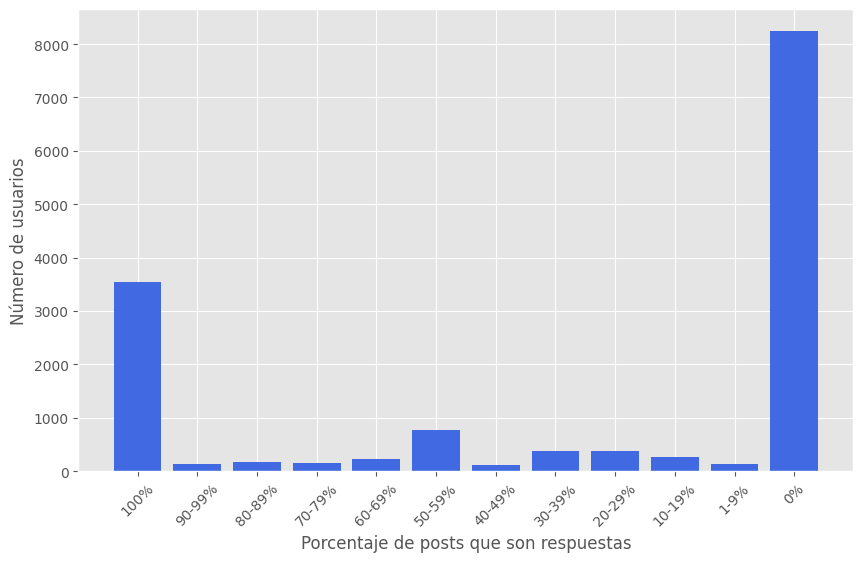

In [ ]:
resultRQ3 = db.posts.aggregate([
    {
        "$group": {  # Agruparemos los posts por el usuario perteneciente a dicho post
            "_id": "$OwnerUserId",
            "TotalPosts": {"$sum": 1},  # Contamos el numero total de posts
            "AnswersMade": {"$sum": {"$cond": {"if": {"$eq": ["$PostTypeId", 2]}, "then": 1, "else": 0}}} # Contamos el número de respuestas
        }
    },
    {
        "$project": {
            "_id": 0,
            "RangoPorcentaje": { # Calcularemos el rango de porcentaje de respuestas de cada usuario a través de un switch, realizando una comparacion con el total de posts
                "$concat": [
                    {
                        "$switch": {
                            "branches": [
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 1]}, "then": "0%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 10]}, "then": "1-9%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 20]}, "then": "10-19%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 30]}, "then": "20-29%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 40]}, "then": "30-39%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 50]}, "then": "40-49%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 60]}, "then": "50-59%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 70]}, "then": "60-69%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 80]}, "then": "70-79%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 90]}, "then": "80-89%"},
                                {"case": {"$lt": [{"$multiply": [{"$divide": [{"$toDouble": "$AnswersMade"}, "$TotalPosts"]}, 100]}, 100]}, "then": "90-99%"},
                                {"case": True, "then": "100%"}
                            ]
                        }
                    }
                ]
            }
        }
    },
    {
        "$group": { # Agrupamos los resultados obtenidos por el rango de porcentaje en el que se encuentren
            "_id": "$RangoPorcentaje",
            "CantidadUsuarios": {"$sum": 1} # Calculamos la cantidad de usuarios que se encuentran en ese rango
        }
    },
    {
        "$addFields": { # Añadimos un nuevo campo para que asigne un numero a cada rango de porcentaje. Para asi poder ordenar posteriormente.
            "Orden": {
                "$indexOfArray": [
                    ["0%", "1-9%", "10-19%", "20-29%", "30-39%", "40-49%", "50-59%", "60-69%", "70-79%", "80-89%", "90-99%", "100%"],
                    "$_id"
                ]
            }
        }
    },
    {
        "$sort": {"Orden": 1} # Ordenamos los resultados segun el campo creado previamente de manera ascendente
    },
    {
        "$project": { # Proyectamos los campos en el formato que queremos
            "_id": 1,
            "RangoPorcentaje": "$_id",
            "CantidadUsuarios": 1
        }
    }
])

# Sacamos la lista correspondiente con el resultado
list_resultRQ3 = list(resultRQ3)

# Separamos los datos en listas para el gráfico de barras
rangos_porcentaje = [resultado["RangoPorcentaje"] for resultado in list_resultRQ3]
cantidad_usuarios = [resultado["CantidadUsuarios"] for resultado in list_resultRQ3]

# Establecemos tamaño suficiente para que se vea bien
plt.figure(figsize=(10, 6))

# Gráfico de barras
plt.bar(rangos_porcentaje, cantidad_usuarios, color='royalblue')

# Ajuste del eje X
plt.gca().invert_xaxis()
plt.xticks(rotation=45)

# Etiquetas
plt.xlabel('Porcentaje de posts que son respuestas')
plt.ylabel('Número de usuarios')

## EJERCICIO 4: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que los usuarios se registran hasta que publican su primera pregunta.

Realizaremos la creación de un indice hash como vimos en la sesion 3, para asi acelerar la agregacion. En caso de no crear este indice, esta agregacion es inviable.

In [ ]:
db.StackOverflowFactsOrdered.create_index([('UserId', pymongo.HASHED)])

'UserId_hashed'

Procedemos a realizar la agregacion

In [92]:
result4 = db.StackOverflowFactsOrdered.aggregate([
    {
        '$match': {'Event': 'Question', "OwnerUserId": {"$ne":''}}  # Filtramos solo preguntas y que tengan un ID de usuario válido
    },
    {
        '$group': { # Agrupamos por el ID del usuario creador de la pregunta
            '_id': '$OwnerUserId',
            'FirstQuestionDate': {'$min': '$CreationDate'}  # Encontramos la fecha de la pregunta más antigua por usuario
        }
    },
    {
        '$lookup': {
            'from': 'StackOverflowFactsOrdered', # Buscamos en la misma coleccion
            'localField': '_id',  # Comparamos el ID del usuario propietario de la pregunta en la coleccion actual (OwnerUserId)
            'foreignField': 'UserId', # Comparamos el ID de usuario en la coleccion StackOverflowFactsOrdered, enfocandonos en las entradas relacionadas con "Users"
            'as': 'user_info' # Almacenamos los resultados en user_info
        }
    },
    {
        "$group": { # Agrupamos los resultados previos y realizamos la media
            "_id": 0,
            "AverageTime": {
                "$avg": {
                    # Calculamos la diferencia entre la fecha de la primera pregunta y la fecha de registro del usuario
                    "$subtract": ["$FirstQuestionDate", {"$arrayElemAt": ["$user_info.CreationDate", 0]}]
                  }
              }
          }
    }
])

# Mostramos el resultado en milisegundos y segundos
for res in result4:
    print("Media de tiempo para primera pregunta:", res['AverageTime'], "milisegundos")
    print("Media de tiempo para primera pregunta:", res['AverageTime']/1000, "segundos")


Media de tiempo para primera pregunta: 1536940004.8161623 milisegundos
Media de tiempo para primera pregunta: 1536940.0048161624 segundos


## EJERCICIO 5: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que se hace una pregunta hasta que se recibe la primera respuesta (ignorar las preguntas sin respuesta), y también desde la pregunta hasta la respuesta aceptada (de nuevo, si no tiene respuesta aceptada, se ignora esa pregunta)

Realizamos la primera consulta, para calcular la media de tiempo que pasa desde que hace una pregunta hasta que se recibe la primera respuesta (ignorando las preguntas sin respuesta)

Creamos el indice hash correspondiente, para asi acelerar la agregacion. En caso de no crear este indice, esta agregacion es inviable.

In [ ]:
db.StackOverflowFactsOrdered.create_index([('PostId', pymongo.HASHED)])

'PostId_hashed'

In [100]:
result5a = db.StackOverflowFactsOrdered.aggregate([
    {
        '$match': {'Event': 'Answer', "OwnerUserId": {"$ne":''}, "ParentId": {"$ne":''}}  # Filtramos solo respuestas que tengan un parent post y el usuario sea válido
    },
    {
        '$group': { # Agrupamos por el ID del post que es padre de la respuesta
            '_id': '$ParentId',
            'FirstAnswerDate': {'$min': '$CreationDate'}  # Encontramos la fecha de la respuesta más antigua por post
        }
    },
    {
        '$lookup': {
            'from': 'StackOverflowFactsOrdered',  # Buscamos en la misma coleccion
            'localField': '_id',  # Comparamos el ID del post que es padre de la respuesta en la coleccion actual (ParentID)
            'foreignField': 'PostId', # Comparamos el ID del post en la coleccion StackOverflowFactsOrdered, enfocandonos en las entradas relacionadas con "Posts"
            'as': 'post_info' # Almacenamos los resultados en post_info
        }
    },
    {
        "$group": { # Agrupamos los resultados previos y realizamos la media
            "_id": 0,
            "AverageTime": {
                "$avg": {
                    # Calculamos la diferencia entre la fecha de la primera respuesta y la fecha de creacion de la pregunta
                    "$subtract": ["$FirstAnswerDate", {"$arrayElemAt": ["$post_info.CreationDate", 0]}]
                  }
              }
          }
    }
])

# Mostramos el resultado en milisegundos y segundos
for res in result5a:
    print("Media de tiempo para recibir la primera respuesta:", res['AverageTime'], "milisegundos")
    print("Media de tiempo para recibir la primera respuesta:", res['AverageTime']/1000, "segundos")

Media de tiempo para recibir la primera respuesta: 419122615.20894504 milisegundos
Media de tiempo para recibir la primera respuesta: 419122.61520894506 segundos


A continuacion realizamos la segunda agregacion, para calcular el tiempo medio entre una pregunta y su respuesta aceptada (en caso de no tener respuesta aceptada, se ignora esa pregunta)

In [101]:
result5b = db.StackOverflowFactsOrdered.aggregate([
    {
        '$match': {'Event': 'Question', "OwnerUserId": {"$ne":''},'AcceptedAnswerId':{"$ne": ''}}  # Filtramos solo preguntas que tengan respuesta aceptada y un usario válido
    },
    {
        '$lookup': {
            'from': 'StackOverflowFactsOrdered', # Buscamos en la misma coleccion
            'localField': 'AcceptedAnswerId', # Comparamos el ID de la respuesta aceptada de en la coleccion actual (AcceptedAnswerId)
            'foreignField': 'PostId', # Comparamos el ID del post en la coleccion StackOverflowFactsOrdered, enfocandonos en las entradas relacionadas con "Posts"
            'as': 'accepted_answer_info' # Almacenamos los resultados en accepted_answer_info
        }
    },
    {
        "$group": { # Agrupamos los resultados previos y realizamos la media
            "_id": 0,
            "AverageTime": {
                "$avg": {
                    # Calculamos la diferencia entre la fecha de la primera respuesta aceptada y la fecha de creacion de la pregunta
                    "$subtract": [{"$arrayElemAt": ["$accepted_answer_info.CreationDate", 0]},"$CreationDate"]
                  }
              }
          }
    }
])

for res in result5b:
    print("Media de tiempo en segundos para la respuesta aceptada:", res['AverageTime'], "milisegundos")
    print("Media de tiempo en segundos para la respuesta aceptada:", res['AverageTime']/1000, "segundos")

Media de tiempo en segundos para la respuesta aceptada: 220707870.88892692 milisegundos
Media de tiempo en segundos para la respuesta aceptada: 220707.87088892693 segundos
